<a href="https://colab.research.google.com/github/yashraj195/Stock_Analysis_ZD/blob/main/TIME_SERIES_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS IS THE CODE OF MEMEBER 5
Team Member 5: Time Series Modeling using LSTM.
Compare traditional vs. ML models.
Train on training set and validate on test set.
                                                                                                                                                                                                                                                                                                

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0201
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.9645e-04
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.2279e-04
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 1.2173e-04
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.1145e-04
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1.0064e-04
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.2609e-04
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.2064e-04
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1.1240e-04
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 1.2462e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
LSTM Test MSE: 74.54093567717936


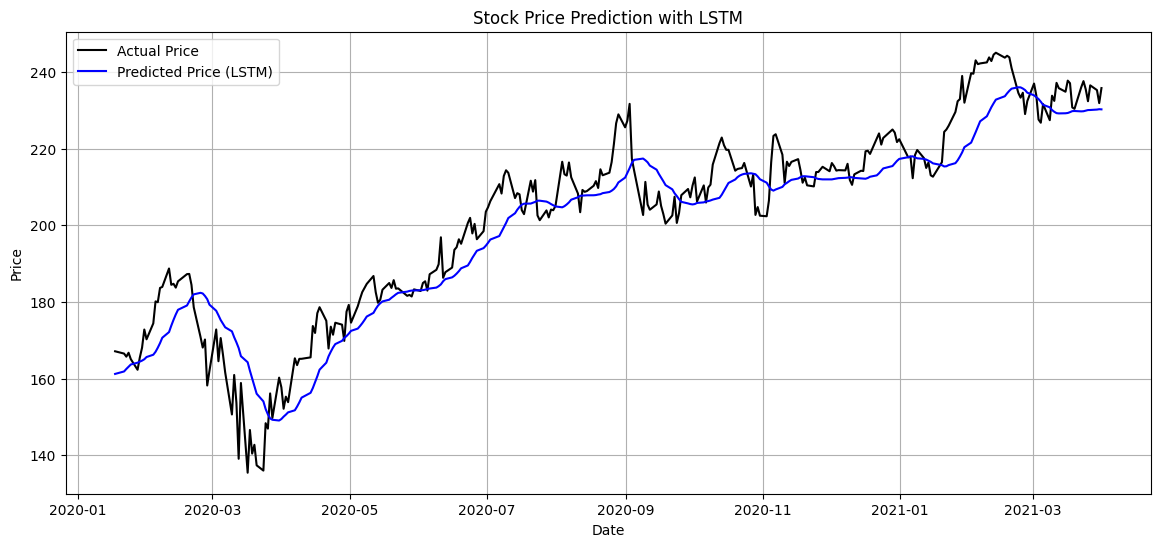

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
df = pd.read_csv("Microsoft_Stock.csv") #WE NEED TO ADD OUR DATASET THAT IS IN CSV FORMAT
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']].dropna()
df.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Train-test split
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)

# Evaluation
mse = mean_squared_error(real_prices, predicted_prices)
print("LSTM Test MSE:", mse)

# Plot
test_dates = df.index[-len(real_prices):]
plt.figure(figsize=(14, 6))
plt.plot(test_dates, real_prices, color='black', label='Actual Price')
plt.plot(test_dates, predicted_prices, color='blue', label='Predicted Price (LSTM)')
plt.title("Stock Price Prediction with LSTM")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

**Task-4 Feature Engineering**

In [ ]:
import pandas as pd

# Load and preprocess
df = pd.read_csv("Microsoft_Stock.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Create new time-based features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek
df['IsMonthStart'] = df.index.is_month_start.astype(int)
df['IsMonthEnd'] = df.index.is_month_end.astype(int)

# Price movement features
df['Price_Range'] = df['High'] - df['Low']
df['Percent_Change'] = df['Close'].pct_change()

# Moving averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

# Volatility (Rolling Std)
df['Volatility_10'] = df['Close'].rolling(window=10).std()

# Momentum
df['Momentum_5'] = df['Close'] - df['Close'].shift(5)

# Volume trends
df['Volume_Change'] = df['Volume'].pct_change()

# Drop NaNs from rolling features
df.dropna(inplace=True)

# Final processed dataset
df.head()


,Open,High,Low,Close,Volume,Year,Month,Day,DayOfWeek,IsMonthStart,IsMonthEnd,Price_Range,Percent_Change,MA_5,MA_10,MA_20,Volatility_10,Momentum_5,Volume_Change
Date,,,,,,,,,,,,,,,,,,,
2015-04-29 16:00:00,48.72,49.31,48.50,49.06,47804562,2015,4,29,2,0,0,0.81,-0.002034,47.492,44.978,43.2080,3.116721,6.07,-0.212845
2015-04-30 16:00:00,48.70,49.54,48.60,48.64,64725457,2015,4,30,3,0,1,0.94,-0.008561,48.552,45.626,43.6040,3.139279,5.30,0.353960
2015-05-01 16:00:00,48.58,48.88,48.40,48.66,38937336,2015,5,1,4,1,0,0.48,0.000411,48.710,46.330,44.0225,2.923024,0.79,-0.398423
2015-05-04 16:00:00,48.37,48.87,48.18,48.24,34039485,2015,5,4,0,0,0,0.69,-0.008631,48.752,46.863,44.3570,2.708165,0.21,-0.125788
2015-05-05 16:00:00,47.82,48.16,47.31,47.60,50369191,2015,5,5,1,0,0,0.85,-0.013267,48.440,47.359,44.6605,2.267076,-1.56,0.479728
